# Testing the Labor Content Effect

## Background on the Labor Content Effect

## Calculation of Labor Content in Monetary Terms

### Iterative Labor Calculation

In [2]:
import numpy as np 
import pandas as pd


def iterative_labor_calculation(A,O,V,n_iterations):
    """iterative_labor_calculation 
    
    Parameters
    ..........
    
    A : matrix of industry coefficients 
        a 1-dimensional mxn numpy array (matrix)
    
    V: variable capital
        a 1-dimensional mx1 numpy array (vector)
        
    O : gross-output 
        a 1-dimensional mx1 numpy array (vector)
        
    n_iterations: cycles of production
        a integer indicating number of iterations 
        
    Returns
    ..........
    
    O1 : labor content in pounds or dollars  
        a 1- dimensional array mx1 (vector)

    """
    
    n=O.shape
    ## initialize array of ones 
    L=np.ones(n)
    
    L=L[:,np.newaxis]
    ## transpose of A 

    for i in range(n_iterations): 
            O1= np.sum(A * L,axis=0) + V ## multiply vector L row by row with A, then sum going down 
            L= O1/O ## divide the result of operation above with O 
    
    return O1

### Random Labor Calculation

In [3]:
def random_labor_calculation(A,O,V,n_iterations):
    """iterative_labor_calculation 
    
    Parameters
    ..........
    
    A : matrix of industry coefficients 
        a 1-dimensional mxn numpy array (matrix)
    
    V: variable capital
        a 1-dimensional mx1 numpy array (vector)
        
    O : gross-output 
        a 1-dimensional mx1 numpy array (vector)
        
    n_iterations: cycles of production
        a integer indicating number of iterations 
        
    Returns
    ..........
    
    O1 : labor content in pounds or dollars  
        a 1- dimensional array mx1 (vector)

    """
    
    n=O.shape
    ## initialize array of ones 
    L=np.random.randint(0,2,n)
    
    L=L[:,np.newaxis]
    ## transpose of A 

    for i in range(n_iterations): 
            O1= np.sum(A * L,axis=0) + V ## multiply vector L row by row with A, then sum going down  
            L= O1/O ## divide the result of operation above with O 
    
    return O1

## Testing the Labor Content Effect 

### Artificial Economy 

### Real Economy: UK-1984

In [31]:
file = '/Users/djamillakhdarhamina/Desktop/uk-1984.csv'
with open(file, 'rt') as f:
    data = pd.read_csv(f, index_col=0)

    
## full dataset 
data

,"Agriculture, forestry & fishing",Mining & quarrying,"Food, beverages & tobacco","Textiles, apparel & leather",Wood products & furniture,"Paper, paper products & printing",Industrial chemicals,Drugs & medicines,Petroleum & coal products,Rubber & plastic products,...,Aircraft,Professional goods,Other manufacturing,"Electricity, gas & water",Construction,Wholesale & retail trade,Restaurants & hotels,Transport & storage,Communication,"Community, social & personal services"
"Agriculture, forestry & fishing",2787,0,9883,348,195,24,25,1,0,101,...,0,0,1,0,6,171,371,10,0,20
Mining & quarrying,6,1036,33,16,2,47,191,2,10923,6,...,7,0,0,4709,231,6,2,4,1,1
"Food, beverages & tobacco",2734,7,7240,236,3,41,207,69,12,1,...,0,0,2,6,24,678,2524,209,1,5
"Textiles, apparel & leather",119,22,9,3783,191,51,19,46,2,119,...,60,9,78,15,174,864,237,75,34,143
Wood products & furniture,39,36,23,2,1429,43,24,0,0,18,...,1,7,26,7,1369,403,15,37,14,28
"Paper, paper products & printing",62,18,1313,192,133,4847,482,119,12,220,...,103,39,138,93,196,1652,81,745,211,399
Industrial chemicals,1351,91,335,724,154,548,5097,336,214,1517,...,106,33,103,143,449,374,36,104,13,138
Drugs & medicines,25,1,96,1,0,2,33,323,1,2,...,1,0,0,1,3,8,4,2,1,21
Petroleum & coal products,391,55,185,50,27,55,1928,24,1462,32,...,25,4,5,4547,302,719,22,2482,65,48
Rubber & plastic products,102,57,608,210,211,177,359,61,17,550,...,51,91,148,73,334,639,59,373,53,41


In [32]:
A = data.loc[:'Communication', :
             'Communication']
A

,"Agriculture, forestry & fishing",Mining & quarrying,"Food, beverages & tobacco","Textiles, apparel & leather",Wood products & furniture,"Paper, paper products & printing",Industrial chemicals,Drugs & medicines,Petroleum & coal products,Rubber & plastic products,...,Motor vehicles,Aircraft,Professional goods,Other manufacturing,"Electricity, gas & water",Construction,Wholesale & retail trade,Restaurants & hotels,Transport & storage,Communication
"Agriculture, forestry & fishing",2787,0,9883,348,195,24,25,1,0,101,...,0,0,0,1,0,6,171,371,10,0
Mining & quarrying,6,1036,33,16,2,47,191,2,10923,6,...,19,7,0,0,4709,231,6,2,4,1
"Food, beverages & tobacco",2734,7,7240,236,3,41,207,69,12,1,...,4,0,0,2,6,24,678,2524,209,1
"Textiles, apparel & leather",119,22,9,3783,191,51,19,46,2,119,...,153,60,9,78,15,174,864,237,75,34
Wood products & furniture,39,36,23,2,1429,43,24,0,0,18,...,68,1,7,26,7,1369,403,15,37,14
"Paper, paper products & printing",62,18,1313,192,133,4847,482,119,12,220,...,138,103,39,138,93,196,1652,81,745,211
Industrial chemicals,1351,91,335,724,154,548,5097,336,214,1517,...,148,106,33,103,143,449,374,36,104,13
Drugs & medicines,25,1,96,1,0,2,33,323,1,2,...,1,1,0,0,1,3,8,4,2,1
Petroleum & coal products,391,55,185,50,27,55,1928,24,1462,32,...,45,25,4,5,4547,302,719,22,2482,65
Rubber & plastic products,102,57,608,210,211,177,359,61,17,550,...,567,51,91,148,73,334,639,59,373,53


In [33]:
## variable capital, employee compensation
V = data.loc['Compensation of employees', :'Communication']
V

Agriculture, forestry & fishing         1616
Mining & quarrying                      1960
Food, beverages & tobacco               5526
Textiles, apparel & leather             3627
Wood products & furniture               1703
Paper, paper products & printing        5356
Industrial chemicals                    2912
Drugs & medicines                        805
Petroleum & coal products                292
Rubber & plastic products               1945
Non-metallic mineral products           2075
Iron & steel                            2685
Non-ferrous metals                       537
Metal products                          2901
Non-electrical machinery                5780
Office & computing machinery             538
Electrical apparatus, nec               2452
Radio, TV & communication equipment     3078
Shipbuilding & repairing                1002
Other transport                          369
Motor vehicles                          3147
Aircraft                                2004
Profession

In [35]:
## gross output , total labor content 
O=data.loc['Gross output', :'Communication']
O

Agriculture, forestry & fishing        15228
Mining & quarrying                     25171
Food, beverages & tobacco              34826
Textiles, apparel & leather            11586
Wood products & furniture               5527
Paper, paper products & printing       15692
Industrial chemicals                   17544
Drugs & medicines                       3228
Petroleum & coal products              14843
Rubber & plastic products               6465
Non-metallic mineral products           7629
Iron & steel                           10854
Non-ferrous metals                      3790
Metal products                          8758
Non-electrical machinery               16314
Office & computing machinery            2571
Electrical apparatus, nec               7329
Radio, TV & communication equipment     9611
Shipbuilding & repairing                2108
Other transport                          828
Motor vehicles                         10557
Aircraft                                5419
Profession

In [40]:
sol=iterative_labor_calculation(A,O,V,20)
sol

Agriculture, forestry & fishing         3937.011879
Mining & quarrying                      2508.652497
Food, beverages & tobacco              17951.269195
Textiles, apparel & leather             8546.402332
Wood products & furniture               4046.665122
Paper, paper products & printing       10569.212977
Industrial chemicals                    7938.899143
Drugs & medicines                       1378.535854
Petroleum & coal products               4013.701440
Rubber & plastic products               4325.581496
Non-metallic mineral products           4194.539022
Iron & steel                            6960.578685
Non-ferrous metals                      1575.785555
Metal products                          6288.861452
Non-electrical machinery               11572.773400
Office & computing machinery            1150.751857
Electrical apparatus, nec               4961.545637
Radio, TV & communication equipment     6085.717127
Shipbuilding & repairing                1854.447806
Other transp

In [38]:
correlation_matrix = np.corrcoef(O,sol )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.8338418712897865

### Real Economy: UK-1990

In [23]:
## uk data io 

file = '/Users/djamillakhdarhamina/Desktop/io.csv'
with open(file, 'rt') as f:
    data = pd.read_csv(f, index_col=0)

    
## full dataset 
data

,"Agriculture, forestry & fishing",Mining & quarrying,"Food, beverages & tobacco","Textiles, apparel & leather",Wood products & furniture,"Paper, paper products & printing",Industrial chemicals,Drugs & medicines,Petroleum & coal products,Rubber & plastic products,...,Statistical discrepancy,Total,Private domestic consumption,Government consumption,Total GFCF,Changes in Stocks,Exports of goods and services,Total final demand,Imports of goods and services,Gross output
"Agriculture, forestry & fishing",3327,0,9993,245,182,44,9,1,0,143,...,0,15459,5872,49,90,113,1830,7955,-3703,19711
Mining & quarrying,9,881,24,10,6,41,261,5,4469,10,...,0,15517,719,34,18,-256,7849,8364,-7709,16172
"Food, beverages & tobacco",2137,28,7067,263,27,91,212,122,27,48,...,0,20449,28655,410,114,129,7122,36431,-11213,45667
"Textiles, apparel & leather",92,2,25,3943,349,111,65,69,1,202,...,0,10009,11039,242,43,-16,6309,17616,-12313,15313
Wood products & furniture,42,40,33,21,2412,106,26,3,2,48,...,0,7293,3516,436,1058,0,517,5527,-3336,9484
"Paper, paper products & printing",169,28,1446,361,165,6367,492,169,51,280,...,0,25361,4763,1067,76,65,3049,9021,-6691,27691
Industrial chemicals,1020,50,440,1078,191,838,5415,346,159,2493,...,0,17556,4404,170,229,-187,12643,17259,-10961,23853
Drugs & medicines,31,4,145,23,11,24,97,503,5,38,...,0,4221,883,31,81,-23,2697,3670,-1631,6260
Petroleum & coal products,169,13,140,14,27,47,927,28,532,29,...,0,5918,3833,240,96,30,3458,7656,-3540,10034
Rubber & plastic products,125,46,1376,288,317,248,704,117,23,777,...,0,11929,1207,207,205,-41,2728,4305,-3914,12320


In [24]:
## A is the matrix of coefficients , the columns and rows included are Agricultre 
A = data.loc[:'Communication', :
             'Communication']
A

,"Agriculture, forestry & fishing",Mining & quarrying,"Food, beverages & tobacco","Textiles, apparel & leather",Wood products & furniture,"Paper, paper products & printing",Industrial chemicals,Drugs & medicines,Petroleum & coal products,Rubber & plastic products,...,Motor vehicles,Aircraft,Professional goods,Other manufacturing,"Electricity, gas & water",Construction,Wholesale & retail trade,Restaurants & hotels,Transport & storage,Communication
"Agriculture, forestry & fishing",3327,0,9993,245,182,44,9,1,0,143,...,2,1,1,1,3,84,408,665,47,5
Mining & quarrying,9,881,24,10,6,41,261,5,4469,10,...,33,5,2,1,7952,159,37,2,10,2
"Food, beverages & tobacco",2137,28,7067,263,27,91,212,122,27,48,...,52,16,11,10,103,266,3483,3358,307,143
"Textiles, apparel & leather",92,2,25,3943,349,111,65,69,1,202,...,282,8,14,135,11,415,1932,356,108,49
Wood products & furniture,42,40,33,21,2412,106,26,3,2,48,...,143,3,4,34,11,2470,242,131,45,26
"Paper, paper products & printing",169,28,1446,361,165,6367,492,169,51,280,...,253,71,93,190,317,766,2900,431,833,207
Industrial chemicals,1020,50,440,1078,191,838,5415,346,159,2493,...,219,52,57,93,114,700,625,65,156,35
Drugs & medicines,31,4,145,23,11,24,97,503,5,38,...,23,4,6,5,16,58,109,18,21,7
Petroleum & coal products,169,13,140,14,27,47,927,28,532,29,...,32,20,1,8,862,162,704,74,1081,61
Rubber & plastic products,125,46,1376,288,317,248,704,117,23,777,...,1543,27,237,219,138,1062,1478,27,538,321


In [5]:
## matrix of industry coeffients/ 
A

,"Agriculture, forestry & fishing",Mining & quarrying,"Food, beverages & tobacco","Textiles, apparel & leather",Wood products & furniture,"Paper, paper products & printing",Industrial chemicals,Drugs & medicines,Petroleum & coal products,Rubber & plastic products,...,Motor vehicles,Aircraft,Professional goods,Other manufacturing,"Electricity, gas & water",Construction,Wholesale & retail trade,Restaurants & hotels,Transport & storage,Communication
"Agriculture, forestry & fishing",3327,0,9993,245,182,44,9,1,0,143,...,2,1,1,1,3,84,408,665,47,5
Mining & quarrying,9,881,24,10,6,41,261,5,4469,10,...,33,5,2,1,7952,159,37,2,10,2
"Food, beverages & tobacco",2137,28,7067,263,27,91,212,122,27,48,...,52,16,11,10,103,266,3483,3358,307,143
"Textiles, apparel & leather",92,2,25,3943,349,111,65,69,1,202,...,282,8,14,135,11,415,1932,356,108,49
Wood products & furniture,42,40,33,21,2412,106,26,3,2,48,...,143,3,4,34,11,2470,242,131,45,26
"Paper, paper products & printing",169,28,1446,361,165,6367,492,169,51,280,...,253,71,93,190,317,766,2900,431,833,207
Industrial chemicals,1020,50,440,1078,191,838,5415,346,159,2493,...,219,52,57,93,114,700,625,65,156,35
Drugs & medicines,31,4,145,23,11,24,97,503,5,38,...,23,4,6,5,16,58,109,18,21,7
Petroleum & coal products,169,13,140,14,27,47,927,28,532,29,...,32,20,1,8,862,162,704,74,1081,61
Rubber & plastic products,125,46,1376,288,317,248,704,117,23,777,...,1543,27,237,219,138,1062,1478,27,538,321


In [25]:
## variable capital, employee compensation
V = data.loc['Compensation of employees', :'Communication']
V

Agriculture, forestry & fishing         3085
Mining & quarrying                      2867
Food, beverages & tobacco              11513
Textiles, apparel & leather             4911
Wood products & furniture               3682
Paper, paper products & printing        8839
Industrial chemicals                    4761
Drugs & medicines                       1682
Petroleum & coal products                664
Rubber & plastic products               3754
Non-metallic mineral products           3526
Iron & steel                            2032
Non-ferrous metals                       523
Metal products                          4160
Non-electrical machinery                4546
Office & computing machinery            1859
Electrical apparatus, nec               8694
Radio, TV & communication equipment     1859
Shipbuilding & repairing                1179
Other transport                          467
Motor vehicles                          5116
Aircraft                                3579
Profession

In [26]:
## gross output , total labor content 
O=data.loc['Gross output', :'Communication']
O

Agriculture, forestry & fishing         19711
Mining & quarrying                      16172
Food, beverages & tobacco               45667
Textiles, apparel & leather             15313
Wood products & furniture                9483
Paper, paper products & printing        27691
Industrial chemicals                    23853
Drugs & medicines                        6260
Petroleum & coal products               10035
Rubber & plastic products               12319
Non-metallic mineral products           12039
Iron & steel                            14777
Non-ferrous metals                       4866
Metal products                          13997
Non-electrical machinery                26312
Office & computing machinery             7600
Electrical apparatus, nec               11269
Radio, TV & communication equipment     14027
Shipbuilding & repairing                 2366
Other transport                          1095
Motor vehicles                          20220
Aircraft                          

In [27]:
## value estimate for gross output
sol=iterative_labor_calculation(A,O,V,8)
sol

Agriculture, forestry & fishing         6031.153373
Mining & quarrying                      4276.902326
Food, beverages & tobacco              28100.462752
Textiles, apparel & leather            10156.705149
Wood products & furniture               8123.393751
Paper, paper products & printing       14816.938040
Industrial chemicals                   10475.003109
Drugs & medicines                       2468.016884
Petroleum & coal products               1715.981405
Rubber & plastic products               7741.464639
Non-metallic mineral products           6921.481734
Iron & steel                            4487.559336
Non-ferrous metals                      1319.884150
Metal products                          8403.710590
Non-electrical machinery                9018.651181
Office & computing machinery            4461.071899
Electrical apparatus, nec              17596.542327
Radio, TV & communication equipment     3791.008440
Shipbuilding & repairing                2097.741942
Other transp

In [96]:
rand_sol=iterative_random_labor_calculation(A,O,V,8)
rand_sol

Agriculture, forestry & fishing         5984.473072
Mining & quarrying                      4275.844119
Food, beverages & tobacco              27556.015772
Textiles, apparel & leather            10135.524117
Wood products & furniture               8070.776595
Paper, paper products & printing       14801.804833
Industrial chemicals                   10416.974853
Drugs & medicines                       2467.616720
Petroleum & coal products               1702.983520
Rubber & plastic products               7722.401760
Non-metallic mineral products           6894.364274
Iron & steel                            4443.549344
Non-ferrous metals                      1259.526652
Metal products                          8381.610191
Non-electrical machinery                8990.412557
Office & computing machinery            4403.413658
Electrical apparatus, nec              17570.447342
Radio, TV & communication equipment     3767.200294
Shipbuilding & repairing                2096.924116
Other transp

In [30]:
correlation_matrix = np.corrcoef(O,sol )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.8909746669565884

In [97]:
correlation_matrix = np.corrcoef(O,rand_sol )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.8896643603234964

### Real Economy : US-2017

In [19]:
file = '/Users/djamillakhdarhamina/Desktop/us-io.csv'
with open(file, 'rt') as f:
    data = pd.read_csv(f, index_col='Name')

df = data.replace('...', '0')
df = df.astype(np.float64)

df

,Farms,"Forestry, fishing, and related activities",Oil and gas extraction,"Mining, except oil and gas",Support activities for mining,Utilities,Construction,Wood products,Nonmetallic mineral products,Primary metals,...,Federal national nondefense: Gross investment in equipment,Federal national nondefense: Gross investment in intellectual property products,State and local: Consumption expenditures,State and local: Gross investment in structures,State and local: Gross investment in equipment,State and local: Gross investment in intellectual property products,Sum of Final Uses (GDP) Selected,Sum of Final Uses (GDP) Not Selected,Total Final Uses (GDP),Total Commodity Output
Name,,,,,,,,,,,,,,,,,,,,,
Farms,59281.0,742.0,0.0,37.0,28.0,0.0,2220.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,72227.0,0.0,72227.0,381082.0
"Forestry, fishing, and related activities",23901.0,8103.0,0.0,60.0,0.0,0.0,0.0,11601.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-2097.0,0.0,-2097.0,68032.0
Oil and gas extraction,0.0,0.0,36005.0,1.0,0.0,28571.0,0.0,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-110347.0,0.0,-110347.0,325848.0
"Mining, except oil and gas",1966.0,1.0,74.0,4698.0,63.0,7723.0,17195.0,5.0,8492.0,11272.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14731.0,0.0,14731.0,87669.0
Support activities for mining,0.0,0.0,10482.0,1711.0,1204.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,142912.0,0.0,142912.0,156367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gross operating surplus,98676.0,8273.0,171756.0,35920.0,11404.0,175254.0,274931.0,16283.0,29263.0,27388.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sum of Value Added Selected,129572.0,36892.0,236811.0,60576.0,49258.0,325852.0,839143.0,40545.0,61669.0,63855.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sum of Value Added Not Selected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
A=df.loc[:'Food services and drinking places',:'Food services and drinking places']
O=df.loc['Total Industry Output',:'Food services and drinking places']
V=df.loc['Compensation of employees',:'Food services and drinking places']

In [21]:
sol=iterative_labor_calculation(A,O,V,3)
correlation_matrix = np.corrcoef(O,sol )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.6012130321081957

### Visualizing Correlation 

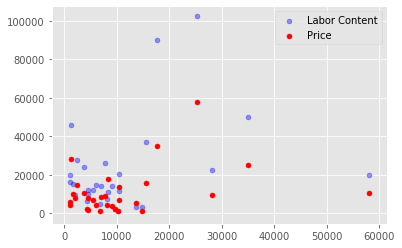

In [160]:
import matplotlib.pyplot as plt

X=np.sort(sol)


with plt.style.context('ggplot'):
    plt.scatter(X, O, alpha=.4, s=25 ,color='blue')
    plt.scatter(X,sol,color='red', s=25)
    plt.legend(['Labor Content', 'Price'])

## Sampling and Bootstrapping 

In [12]:
def most_var_rows(data,n):
    """
    
    Subset n most variable genes
    
    Parameters
    ..........
    
    data: 2D array of float
    n: int, optional 
        Number of rows to return. 
    
    Return
    ..........
    variable_data=2D array of float 
    
    """
    
    # compute accorss columns
    
    rowvar=np.var(data,axis=1)
    # get indices
    
    sort_indices=np.argsort(rowvar)[-n:]
    
    variable_data=data[sort_indices,:]
    
    return variable_data

In [102]:
X_Y=np.c_[sol,O]
sample=most_var_rows(X_Y,10)
correlation_matrix = np.corrcoef(sample[:,0] , sample[:,1] )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.9111723635675494

In [228]:
def bootstrap_ilc(A,O,V,sample_size,boot_iter, ilc_iter):
    
    """ bootstrap sample ILC 
    
    
    
    
    Parameters 
    
    ..........
    
    
    
    Returns
    
    ...........
    
    

    """
    
    R_2=[]
    
    for i in range(boot_iter):
        
        ## random sample of inputs - first level 
        sol=iterative_labor_calculation(A,O,V,ilc_iter)
        X_Y=np.c_[sol,O]
        ## random sample of result - second level 
        random_indexes=np.random.randint(0,10,sample_size)
        random_indexes=np.unique(random_indexes)
        random_sample=X_Y[random_indexes,:]
        correlation_matrix = np.corrcoef(random_sample[:,0] , random_sample[:,1] ) 
        correlation_xy = correlation_matrix[0,1]
        r_squared = correlation_xy**2
        R_2.append(r_squared)
                
    return np.array(R_2).mean()

In [232]:
bootstrap_ilc(A,O,V,30,20,6)

0.8663781430761179

## Linear Regression Model and Prediction 

In [257]:
def model(X,Y):
    X_b=np.c_[np.ones(X.shape),X]
    theta=np.linalg.inv(X_b.T @ X_b).dot(X_b.T.dot(O))
    return theta 

def predict(x,theta):
    array=np.array(x)
    array_b=np.c_[np.ones(array.shape),array]
    prediction=array_b.dot(theta)
    return prediction

In [258]:
params=model(sol,O)
params

array([1461.65292983,    1.84028746])

In [261]:
pred=predict(sol.values,params)
pred

array([ 12501.66856484,   9329.67752514,  52873.02994307,  20118.11454578,
        16397.02622571,  28715.23853045,  20609.68838945,   6002.85146379,
         4479.41430238,  15677.96581778,  14175.54802271,   9622.94182521,
         3828.90842405,  16894.97682719,  17974.7715752 ,   9621.89937614,
        33882.11984978,   8379.42515112,   5321.56118051,   3442.9438619 ,
        26344.0650878 ,  13880.97162517,  11634.86255714,   3295.74652557,
        29148.9132396 ,  65360.21877634, 108245.06509029,  19285.5454716 ,
        47864.38602604,  20719.45419826])

In [262]:
X_Y=np.c_[pred,O]
sample=most_var_rows(X_Y,10)
correlation_matrix = np.corrcoef(sample[:,0] , sample[:,1] )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared


0.7441053305799552